<a href="https://colab.research.google.com/github/ayush-09/OpenCv/blob/master/OpenCV_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Technology & Libraries Used
- Python
- OpenCV
- Numpy
- Matplotlib


## Import the libraries

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## OCR Model


### Tesseract - OCR Engine

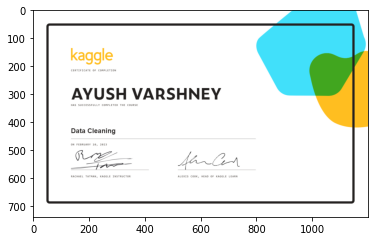

In [15]:
import pytesseract

ocr_image=cv2.imread("a.png")

plt.imshow(ocr_image)


For the colab run this command first

In [16]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [17]:
t=pytesseract.image_to_string(ocr_image)


In [18]:
print(t)

kaggle

AYUSH VARSHNEY

Data Cleaning

 

 

 



### Task1: Detect the left-hand margin 

## Line Detection by Hough Transform Algorithm

- The Hough Transform Algorithm is a computer vision technique used to detect lines in images or videos. It works by transforming the image into a parameter space, where each point in the image is represented by a sinusoidal curve in the parameter space. The intersections of these curves in the parameter space represent the possible lines in the image. The algorithm then identifies the peaks in the accumulator array, which correspond to the most likely lines in the image. The Hough Transform is robust against noise and can detect lines with sub-pixel accuracy.

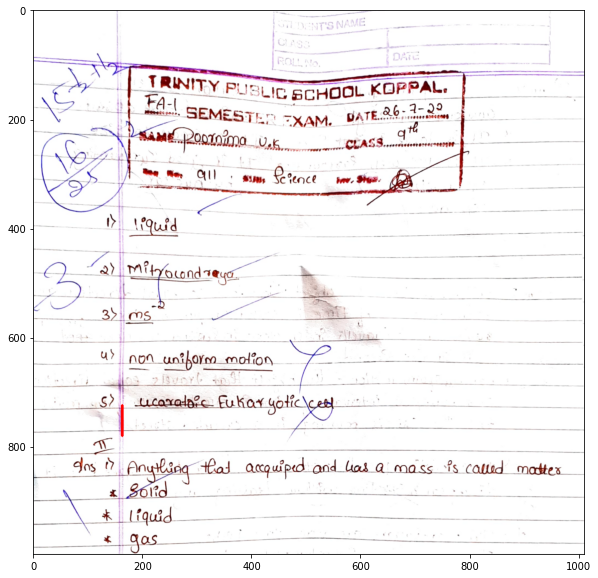

In [ ]:
# Load the image
img = cv2.imread('/content/A003.png')  # Check the margin on 3rd pnd image

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to the grayscale image
edges = cv2.Canny(gray, 50, 150)

# Find the lines in the image using HoughLinesP method
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)

# Loop through the lines and draw them on the image
left_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    if x1 == x2: # Check if the line is vertical
        if x1 < img.shape[1] // 2: # Check if the line is on the left side of the image
            left_lines.append(line)

if len(left_lines) >= 2:
    x1, y1, x2, y2 = left_lines[1][0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3) # red color marked for the margin
# Show the image with the margin line
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()


### Task 2: Detect the teacher's marking(tick, crosses and marks)

This code detects contours in the image and filters for those that are long and thin, which could potentially correspond to tick marks. The aspect ratio and height thresholds used in this example will likely need to be adjusted based on the specific images you are working with.

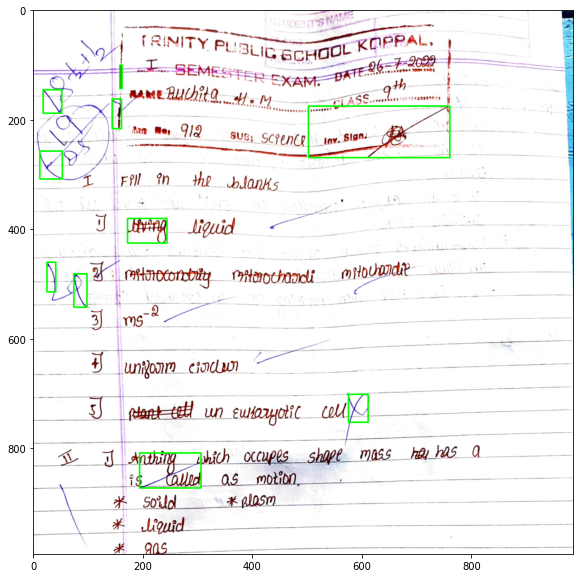

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/A001.png') # Check the marking on the 1st png image

# Convert the image to grayscale
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to the grayscale image to binarize it
threshold_value, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

# Find the contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through the contours and filter for those that are long and thin
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) // h
    if aspect_ratio < 8 and h > 42: # Adjust the aspect ratio and height thresholds as needed
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2) # Green color box marked for the marking

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

## Final Result combining both the task and check on different image

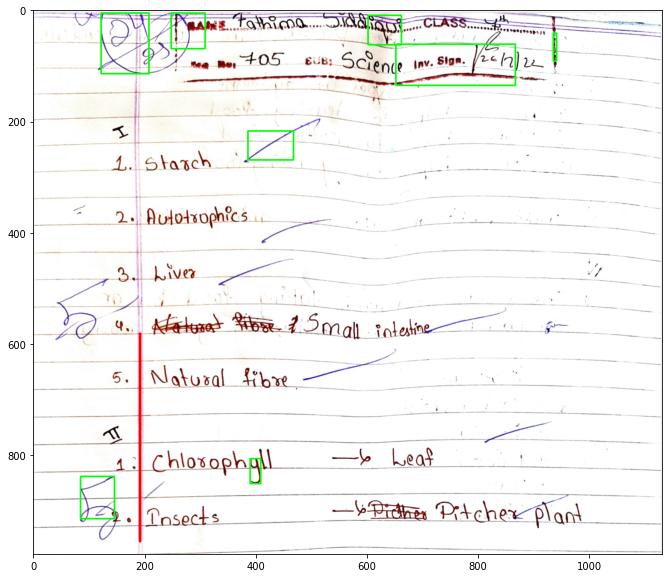

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/A002.png') # Check the output on 2nd image

# Convert the image to grayscale
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150)

# Find the lines in the image using HoughLinesP method
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)

# Loop through the lines and draw them on the image
left_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    if x1 == x2: # Check if the line is vertical
        if x1 < img.shape[1] // 2: # Check if the line is on the left side of the image
            left_lines.append(line)

if len(left_lines) >= 2:
    x1, y1, x2, y2 = left_lines[1][0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3) # Red color for margin

# Apply a threshold to the grayscale image to binarize it
threshold_value, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

# Find the contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through the contours and filter for those that are long and thin
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) // h
    if aspect_ratio < 8 and h > 42: # Adjust the aspect ratio and height thresholds as needed
        cv2.rectangle(img, (x, y), (x + w, y + h), (0,255, 0), 2) # Green color for marking

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()